# HW2 - CLUSTER ANALYSIS AND DECISION TREE INDUCTION

In [608]:
# import necessary libraries
import matplotlib.pyplot as plt #For plotting
%matplotlib inline
import numpy as np #Provides fast numerical computing such as arrays and linear algebra
import pandas as pd #Provides R like data structures and a high level API to work with data
from pandas import DataFrame, Series
import seaborn as sns #To make your plots look better
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
import re
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
import sklearn.metrics as ms
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

**Once the required libraries are loaded, we can go ahead and intialize the dataset.**

In [549]:
data=pd.read_csv("C:/Users/Aditya Ganesh/Desktop/IST 707 - Data Analytics/HW2_Decision trees and cluster analysis/Disputed_Essay_data.csv")

**Count of Papers with respect to authors**

In [551]:
data.iloc[:,0].value_counts()
data1=data
data

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.000
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.000
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.000
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.000
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.000
5,dispt,dispt_fed_54.txt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,...,0.007,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.000
6,dispt,dispt_fed_55.txt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,...,0.015,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.000
7,dispt,dispt_fed_56.txt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,...,0.018,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.000
8,dispt,dispt_fed_57.txt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,...,0.027,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.000
9,dispt,dispt_fed_62.txt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,...,0.000,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.000


**Removing authors 'Jay' and 'HM'**

In [552]:
data=data.drop(data.index[62:70],axis=0)

**Extracting the author name along with the file number to create a new column called 'new file'. This column will be used as row index.**

In [553]:
data['Owner']= data['author'].str[:1]

In [554]:
data['No.'] = data.filename.str.extract('(\d+)')

In [555]:
data['new file']= data['Owner']+ "_" + data['No.']

In [556]:
data=data.set_index('new file')

In [557]:
data=data.drop(['filename','Owner','No.'],axis=1)

In [558]:
data

,author,a,all,also,an,and,any,are,as,at,...,was,were,what,when,which,who,will,with,would,your
new file,,,,,,,,,,,,,,,,,,,,,
d_49,dispt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.000
d_50,dispt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.000
d_51,dispt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.000
d_52,dispt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.000
d_53,dispt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.000
d_54,dispt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,0.015,...,0.007,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.000
d_55,dispt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,0.116,...,0.015,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.000
d_56,dispt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,0.037,...,0.018,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.000
d_57,dispt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,0.047,...,0.027,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.000


In [559]:
data_woa=data.iloc[:,1:]


**Plotting the pairwise correlation between different rows. (correlation between papers of different authors)**

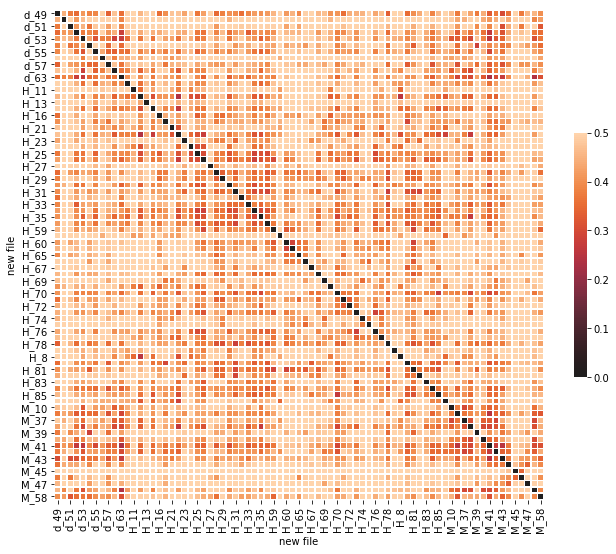

In [560]:
dist_matrix = pd.DataFrame(distance_matrix(data_woa.values,
                           data_woa.values, p=2),
                           index=data_woa.index,
                           columns=data_woa.index)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dist_matrix, vmax=.5, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

# Elbow Method to find optimal K-Value

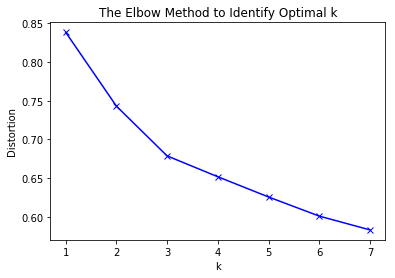

In [561]:
distortions = []
K = range(1, 8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dist_matrix)
    kmeanModel.fit(dist_matrix)
    distortions.append(sum(np.min(cdist(dist_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / new_data.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

**From the above figure, it is clear that there is an eblow formed when value of k is 3.**

# K Means Clustering using Default settings

In [562]:
kmeans_def=KMeans(n_clusters=3)
kmeans_def

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [563]:
y_pred=kmeans_def.fit_predict(data_woa)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

# K Means Clustering - Parameter Tuning and predicting the categories into which the disputed paper is seen - 'Madison or Hamilton'

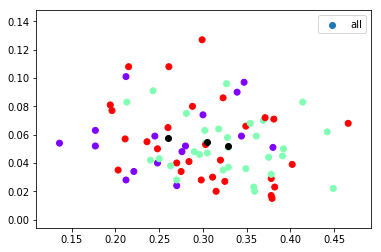

In [564]:
kmeans = KMeans(n_clusters=3, n_init=25, max_iter=300, random_state=6)
kmeans.fit(data_woa)
y_kmeans = kmeans.predict(data_woa)
plt.scatter(data_woa.iloc[:,0],data_woa.iloc[:,1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.legend()

**The cluster value K=3 was chosen because the optimal k value was found using the ELBOW method. Maximum iteration in a single run for this data was set to 300 as these many number of iterations were required for the data points to be clustered efficiently. Number of time the k-means algorithm will be run with different centroid seeds was set as n_int=25. The final results will be the best output of n_init consecutive runs in terms of inertia.**

In [565]:
y_kmeans

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [566]:
data['value']=y_kmeans
data

,author,a,all,also,an,and,any,are,as,at,...,were,what,when,which,who,will,with,would,your,value
new file,,,,,,,,,,,,,,,,,,,,,
d_49,dispt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.000,0
d_50,dispt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.000,0
d_51,dispt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.000,0
d_52,dispt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.000,0
d_53,dispt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.000,1
d_54,dispt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,0.015,...,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.000,0
d_55,dispt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,0.116,...,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.000,1
d_56,dispt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,0.037,...,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.000,1
d_57,dispt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,0.047,...,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.000,0


**Visualizing the data in table format to understand under which author the disputed papers are most likely to be seen.**

In [567]:
x = data['author']
y = data['value']
z=pd.crosstab(x, y, rownames = ['x'], colnames = ['y']);
z

y,0,1,2
x,,,
Hamilton,1,20,30
Madison,8,7,0
dispt,7,4,0


**From the above plot and table we understand that the disputed papers belong to Madison.**

# HAC

**Splitting the dataset into training and testing data based on the authors of the papers. The disputed Papers will be kept as the testing set as the names of the author is unknown. The training set will be used for initial modelling and the testing data will be applied to the trained model to find the author(s) of the disputed paper.** 

In [586]:
train = data1.loc[data1['author'] != 'dispt']
xtrain=train.drop(['author','filename'],axis=1)
ytrain= train['author']

test = data1.loc[data1['author'] == 'dispt']
xtest = test.drop(['author','filename'],axis=1)
ytest = test['author']

**Preprocess the data using Label Encoder**

In [587]:
le = preprocessing.LabelEncoder()
le.fit(ytrain)
y = le.transform(ytrain)

**The values are scaled so that the data does not mislead the algorithm when applied. This is done using MinMaxScaler. The values of both testing and training dataset are scaled.** 

In [588]:
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(xtrain)
xtrain_norm = pd.DataFrame(np_scaled, columns=xtrain.columns, index=xtrain.index)

In [589]:
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(xtest)
xtest_norm = pd.DataFrame(np_scaled, columns=xtest.columns, index=xtest.index)

In [590]:
dist_matrix1 = pd.DataFrame(euclidean_distances(xtrain_norm, xtrain_norm),
                           index=xtrain_norm.index,
                           columns=xtrain_norm.index)

**Elbow Method for identifying optimal K value**

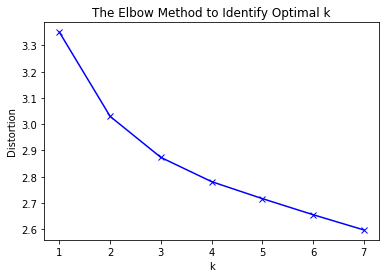

In [591]:
distortions = []
K = range(1, 8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dist_matrix1)
    kmeanModel.fit(dist_matrix1)
    distortions.append(sum(np.min(cdist(dist_matrix1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / new_data.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

**Optimal K value can be either k=2 or k=3**

**Plot the 'Dendogram'for HAC Method**

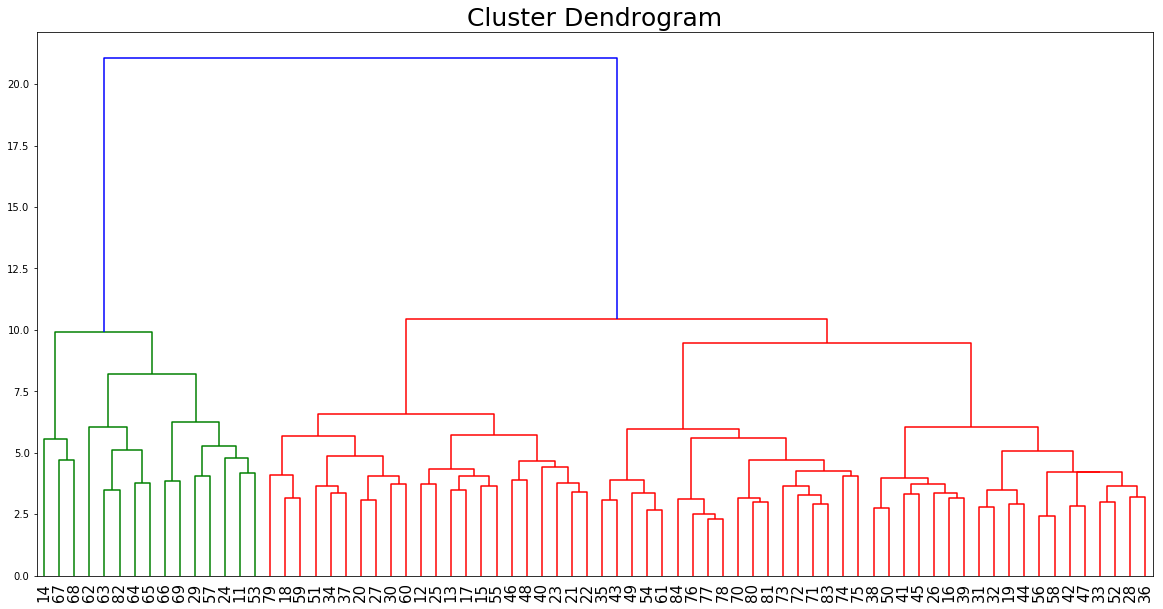

In [592]:
linkage_data = ward(dist_matrix1)
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False) 
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_data, orientation='top', labels=dist_matrix1.index)
plt.xticks(fontsize=15)
plt.show()

In [593]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hac.fit(xtrain_norm)
labels = hac.labels_

In [594]:
ms.accuracy_score(y,labels)

0.7297297297297297

In [595]:
hac_dataframe = pd.DataFrame({'Author' : ytrain[:],
                   'Encoded Value' : y[:],
                   'Predicted Value' : labels[:]})
hac_dataframe

,Author,Encoded Value,Predicted Value
11,Hamilton,1,1
12,Hamilton,1,1
13,Hamilton,1,1
14,Hamilton,1,1
15,Hamilton,1,1
16,Hamilton,1,1
17,Hamilton,1,1
18,Hamilton,1,1
19,Hamilton,1,1
20,Hamilton,1,1


In [596]:
hac.fit(xtest_norm)
labels = model.labels_

**The plot for 11 Disputed papers are shown below:**

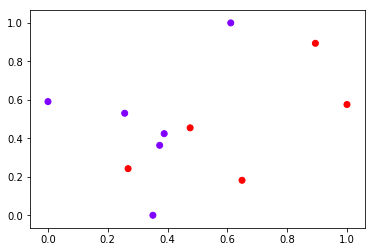

In [597]:
plt.scatter(xtest_norm.iloc[:,0],xtest_norm.iloc[:,1], c=labels, cmap='rainbow')

In [598]:
labels

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

**Thus after splitting the data as testing(disputed papers) and training sets(Hamilton and Madison) with HAC, we understand through the above plot that disputed paper belongs to Madison.**

# Decision Tree

In [599]:
np.random.seed(66)

In [600]:
Dtree = DecisionTreeClassifier()
Dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Building the decision tree using the training data**

In [601]:
Dtree.fit(xtrain, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Predicting the value based on the test data**

In [602]:
Predicted_value = Dtree.predict(xtest)
Predicted_value 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Thus after applying the disputed paper data to the decision tree algorithm, we are sure that all the disputed paper belongs to Madison.

# Hyper Parameter Model Tuning using GridSearchCV

In [603]:
grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10],
              'max_depth': [5, 10],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 4]}
grid_search = GridSearchCV(Dtree, grid, cv=3, scoring='accuracy')
grid_search.fit(xtrain, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10], 'max_depth': [5, 10], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

**GridSearch - BestScore**

In [604]:
print(grid_search.best_score_)

0.8918918918918919


In [605]:
for hps, values in grid_search.best_params_.items():
  print(f"{hps}: {values}")

criterion: gini
max_depth: 5
max_leaf_nodes: 4
min_samples_leaf: 1
min_samples_split: 2
